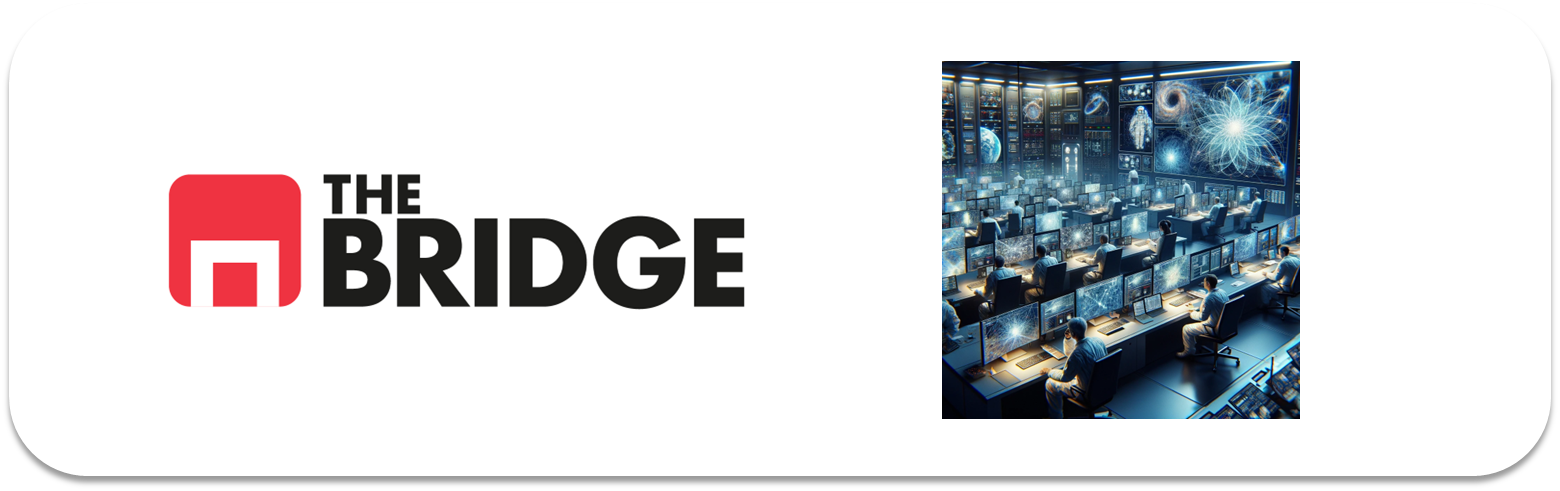

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
import cv2

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



Paso 1: Crear los datasets X, y de train y test


In [2]:


def read_images_from_folders(folders, img_size=(32, 32)):
    X, y = [], []
    for folder in folders:
        for file in os.listdir(folder):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                # Leer la imagen
                img_path = os.path.join(folder, file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)  # Redimensionar
                X.append(img)
                
                # Etiquetar la clase (según el nombre del archivo)
                label = 1 if "dog" in file.lower() else 0  # 'dog' = 1, 'cat' = 0
                y.append(label)
    return np.array(X), np.array(y)

# Rutas de las carpetas
train_folders = [
    './data/github_train_0', './data/github_train_1',
    './data/github_train_2', './data/github_train_3'
]
test_folder = './data/github_test'

# Carga de los datos
X_train, y_train = read_images_from_folders(train_folders)
X_test, y_test = read_images_from_folders([test_folder])


Paso 2: Crear el modelo de red convolucional (CNN)

In [3]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Salida binaria
])


c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Paso 3: Entrenar el modelo con EarlyStopping

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [6]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop],
    batch_size=32
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.5091 - loss: 8.1247 - val_accuracy: 0.7912 - val_loss: 0.6126
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6186 - loss: 0.6587 - val_accuracy: 0.0587 - val_loss: 1.3068
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6567 - loss: 0.6197 - val_accuracy: 0.2825 - val_loss: 0.8804
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6884 - loss: 0.5934 - val_accuracy: 0.4737 - val_loss: 0.7961
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7011 - loss: 0.5755 - val_accuracy: 0.5537 - val_loss: 0.7171
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.7406 - loss: 0.5298 - val_accuracy: 0.3638 - val_loss: 0.9650


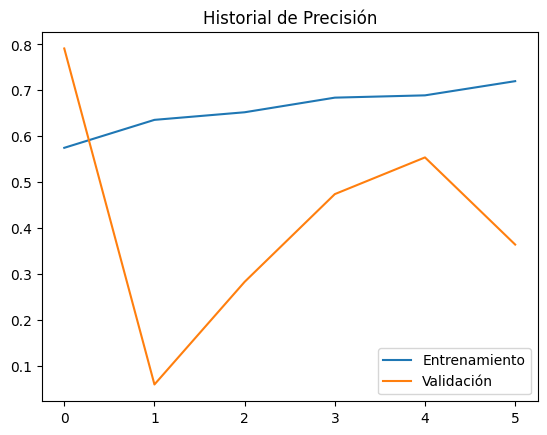

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Historial de Precisión')
plt.legend()
plt.show()


Paso 4: Evaluar el modelo

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype('int32')  # Predecir
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.63      0.34      0.44       500
           1       0.55      0.80      0.65       500

    accuracy                           0.57      1000
   macro avg       0.59      0.57      0.55      1000
weighted avg       0.59      0.57      0.55      1000

[[172 328]
 [102 398]]


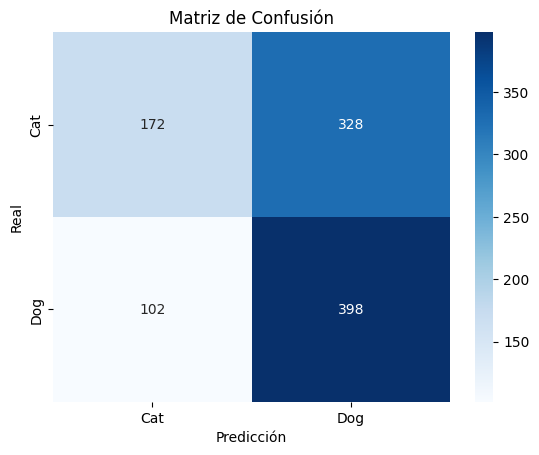

In [9]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()


Paso 5: Selección de imágenes difíciles

In [10]:
y_probs = model.predict(X_test).flatten()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [12]:
import numpy as np

y_test = y_test.flatten()
misclassified = np.where((y_pred.flatten() != y_test))[0]
misclassified_probs = y_probs[misclassified]

# Selecciona el 10% más difíciles
selected_idx = misclassified[np.argsort(-misclassified_probs)[:len(misclassified)//10]]


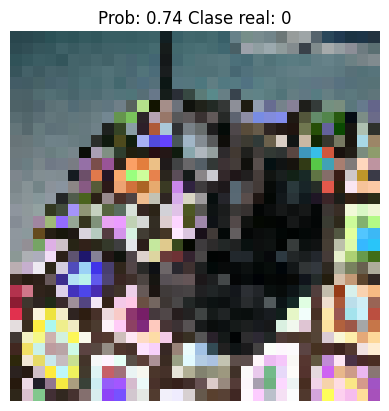

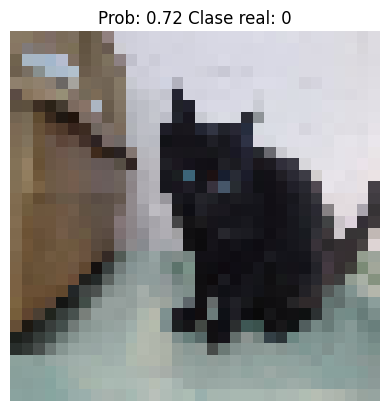

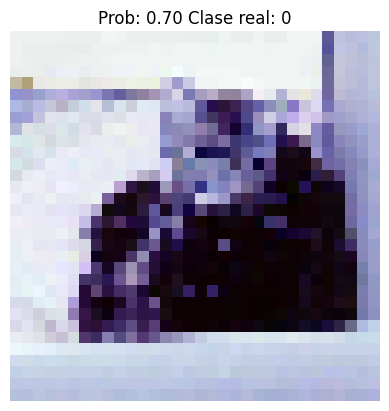

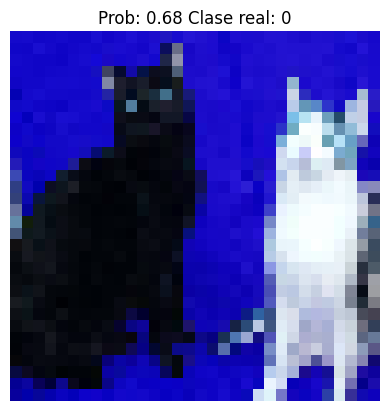

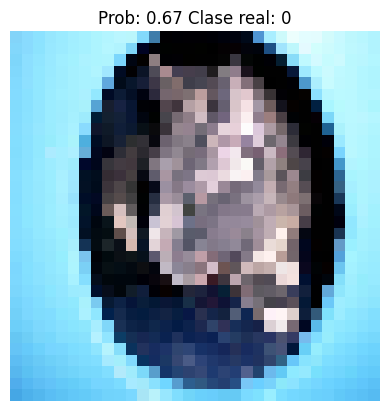

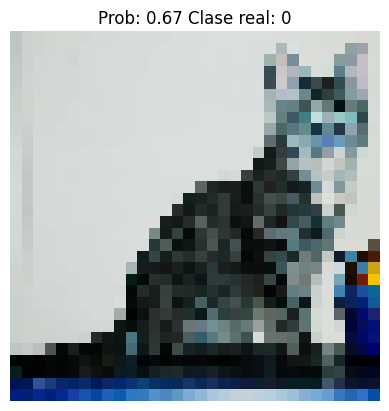

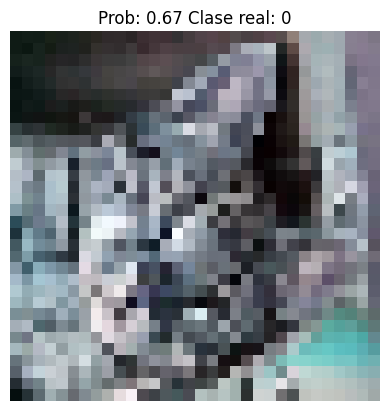

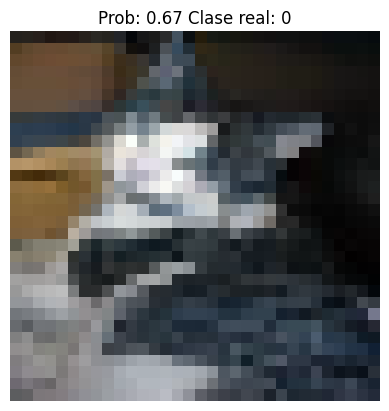

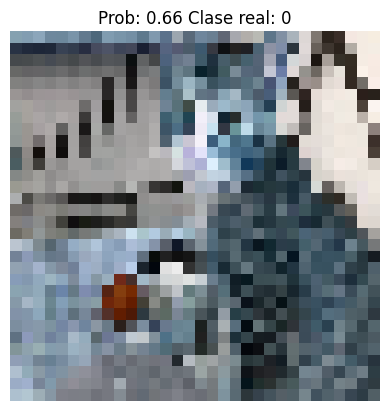

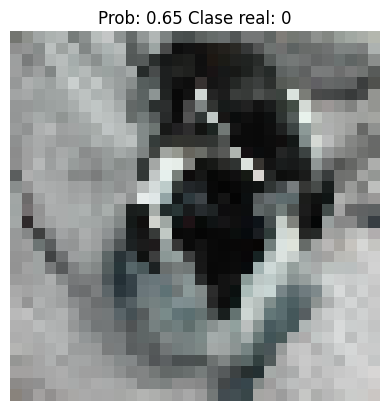

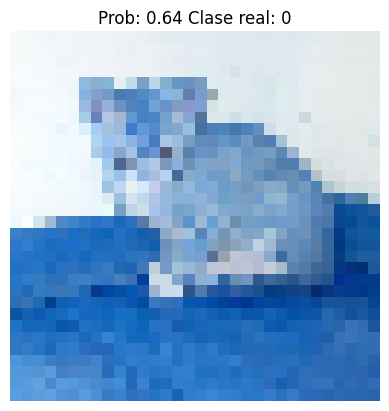

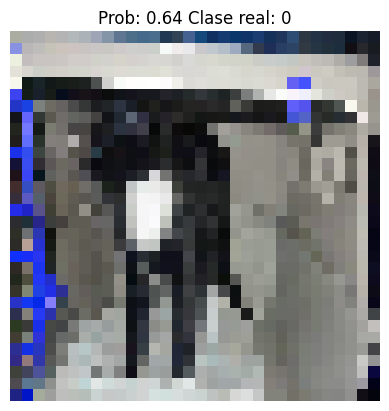

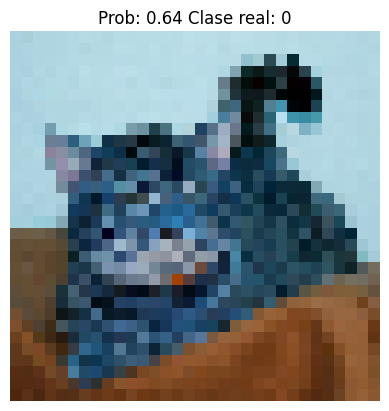

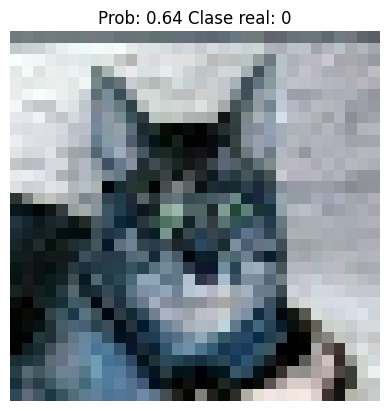

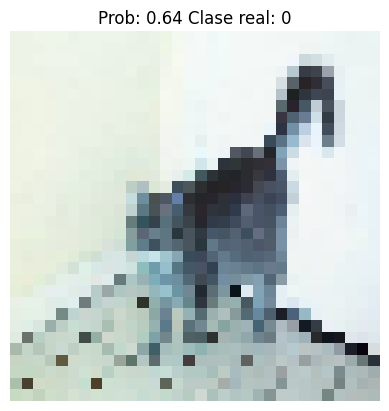

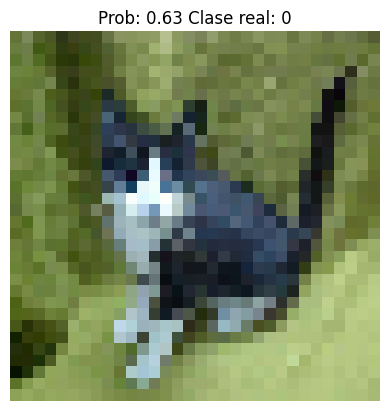

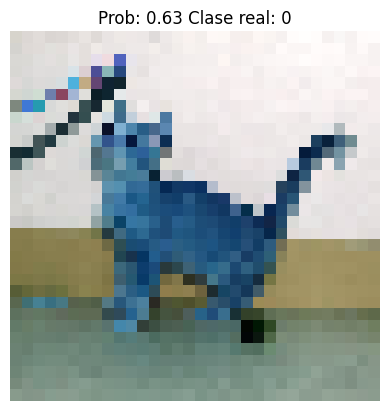

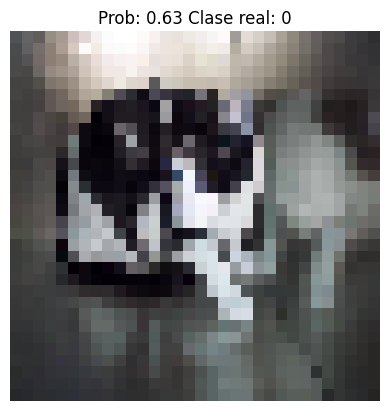

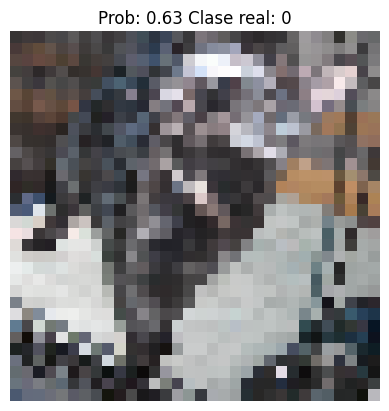

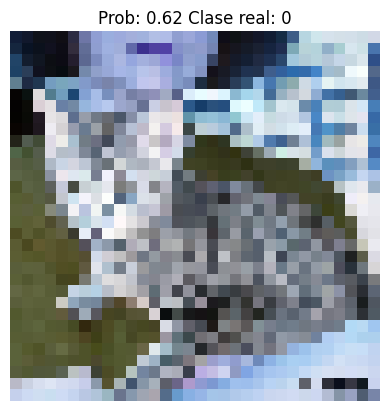

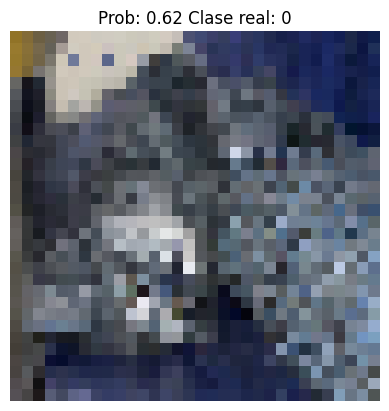

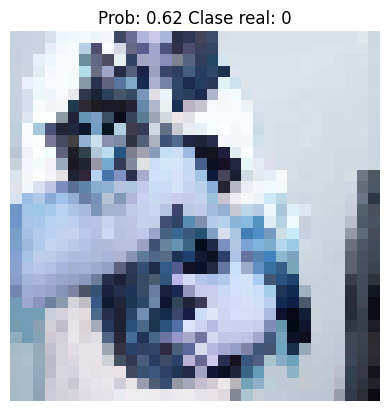

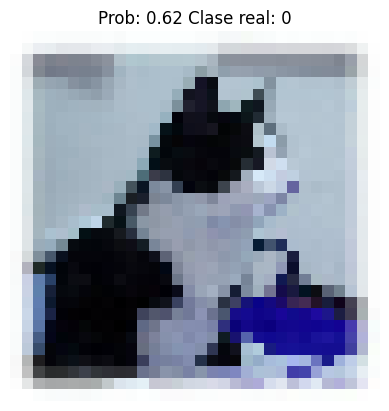

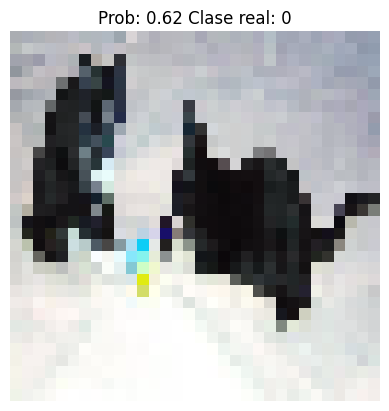

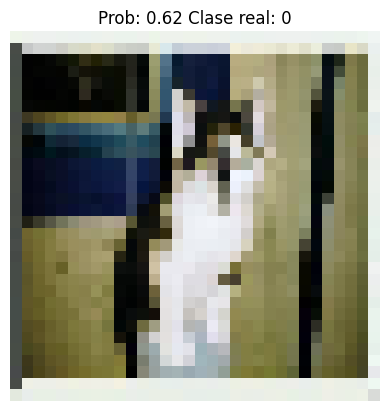

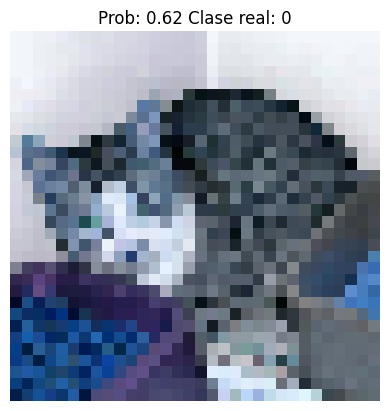

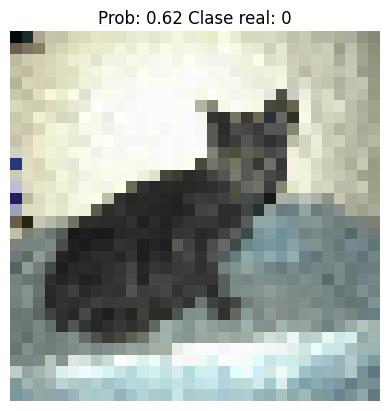

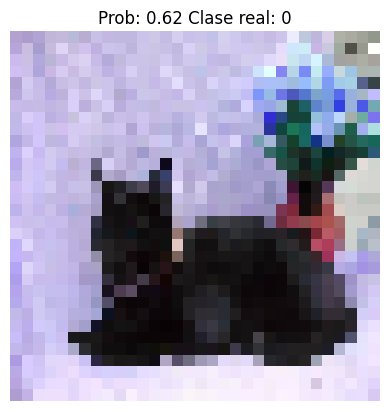

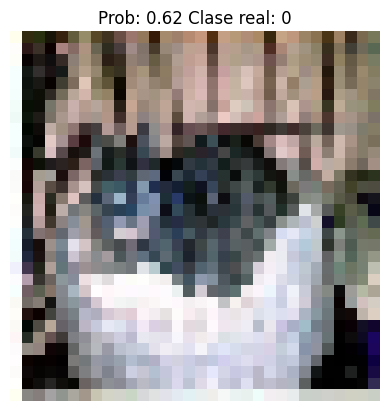

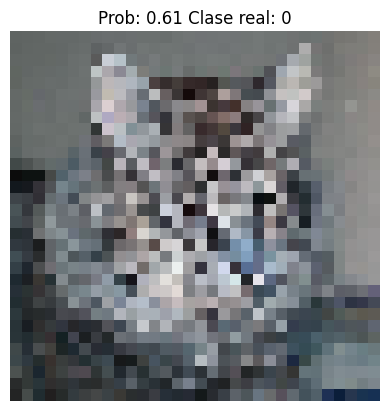

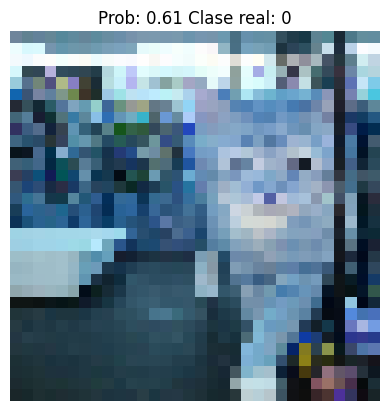

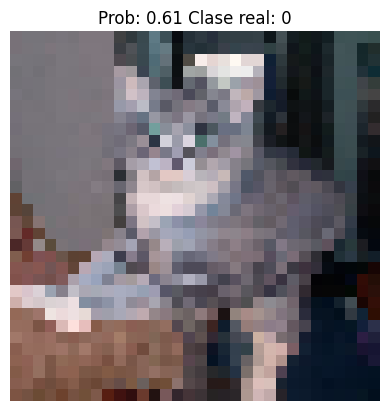

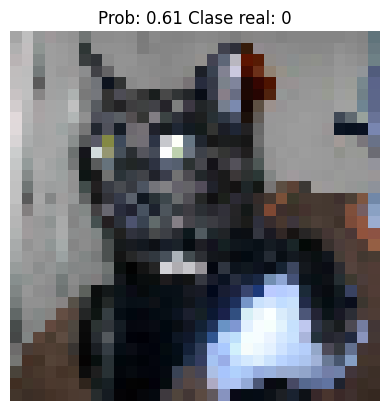

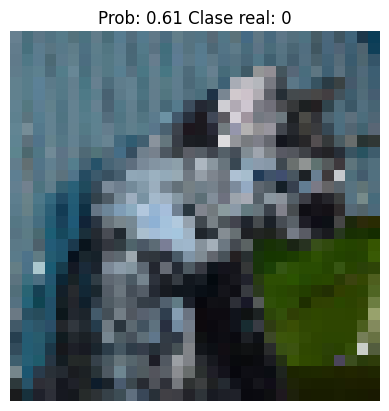

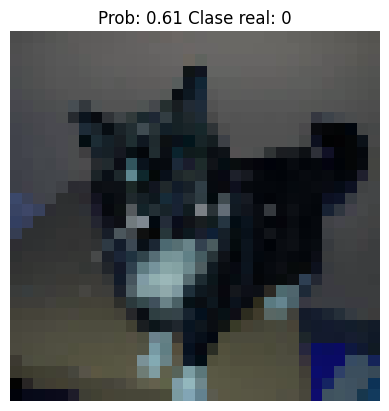

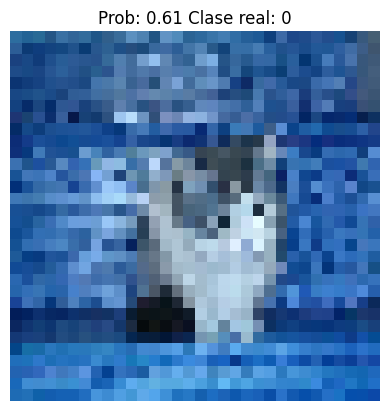

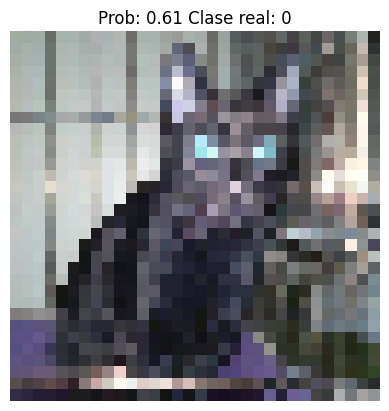

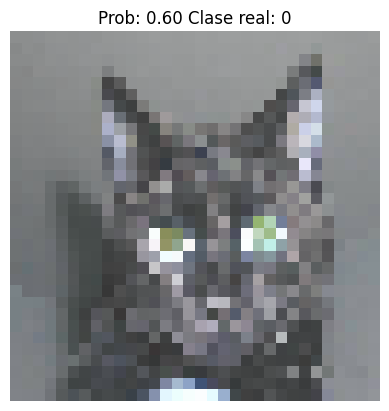

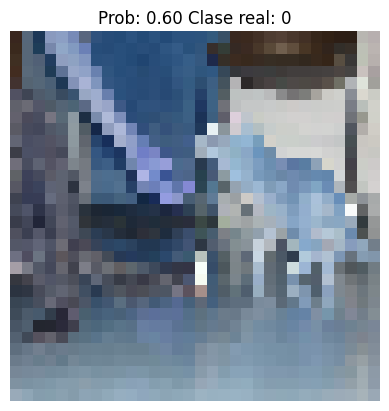

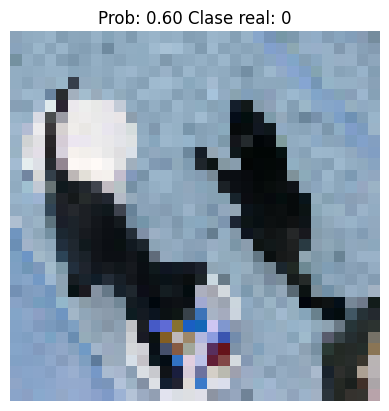

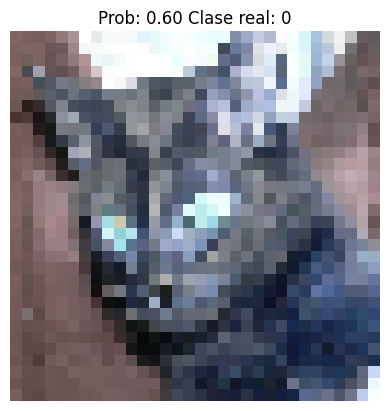

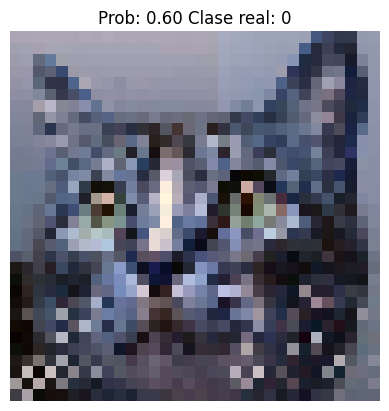

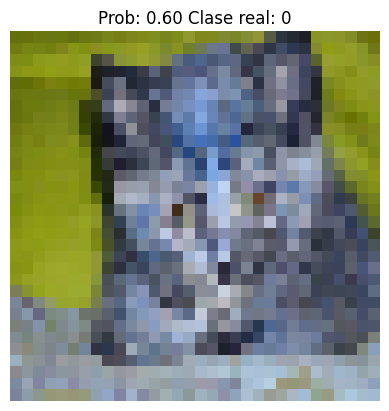

In [13]:
for idx in selected_idx:
    plt.imshow(X_test[idx])
    plt.title(f"Prob: {y_probs[idx]:.2f} Clase real: {y_test[idx]}")
    plt.axis('off')
    plt.show()


Extra: Image Augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Divide los datos manualmente
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Generadores para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train_split, y_train_split, batch_size=32)
val_generator = val_datagen.flow(X_val_split, y_val_split, batch_size=32)

# Entrena el modelo con generadores explícitos
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop]
)


c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.5518 - loss: 0.6921 - val_accuracy: 0.6263 - val_loss: 0.6453
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5670 - loss: 0.6764 - val_accuracy: 0.5512 - val_loss: 0.7107
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.6043 - loss: 0.6591 - val_accuracy: 0.6187 - val_loss: 0.6458
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.6105 - loss: 0.6541 - val_accuracy: 0.5950 - val_loss: 0.6530
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.6078 - loss: 0.6530 - val_accuracy: 0.5063 - val_loss: 0.7961
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.6213 - loss: 0.6436 - val_accuracy: 0.6350 - val_loss: 0.6369
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.6279 - loss: 0.6349 - val_accuracy: 0.6425 - val_loss: 0.6172
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.6273 - loss: 0.6296 - va